# Load Dataset

In [2]:
import pandas as pd

In [4]:
dataset = pd.read_csv("../data/PN_dataset/dataset_1600.csv")

In [20]:
dataset = dataset[["review", "PN"]]

In [24]:
dataset.to_csv("../data/PN_dataset/dataset_3.csv")

# Data Distiribution
- 각각 800개씩 있습니당

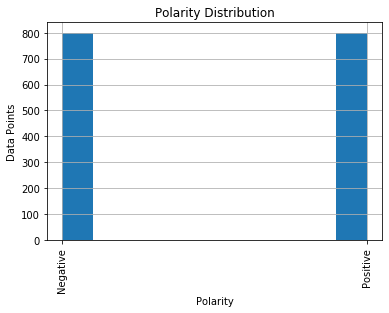

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Load the polarity data
x = dataset['PN']

labels = ['Negative', 'Positive']
plt.xlabel('Polarity')
plt.ylabel('Data Points')
plt.title("Polarity Distribution")
plt.hist(x)
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(np.arange(0,2,1), labels, rotation='vertical')
plt.grid(True)
plt.show()

# Cleaning text data

In [8]:
import re
from nltk.corpus import stopwords

In [21]:
stop = stopwords.words('english')

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emos = re.findall('(?::|;}=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +' '.join(emos).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized

# 한번에 하나의 문서를 읽고 리턴하는 생성기 함수
def stream(path):
    with open(path, 'r') as csv:
        next(csv)
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label

# 파라미터 사이즈에 의해 지정된 전체 문서를 반환
def minibatch(stream, size):
    docs, y = [], []
    try:
        for _ in range(size):
            text, label = next(stream)
            docs.append(text)
            y.append(label)
    except StopIteration:
            return None, None
    return docs, y

In [11]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vect = HashingVectorizer(decode_error="ignore",
                        n_features=2**21,
                        preprocessor=None,
                        tokenizer=tokenizer)

# Convert words to vectors for Navie Baye's classifier
vectorizer = CountVectorizer(stop_words='english')

# Logistic Regression
clf1 = SGDClassifier(loss = 'log', random_state=1)

# Support Vector Machines
clf2 = SGDClassifier(loss = 'hinge', penalty='l2', random_state=1)

# Naive Baye's
clf3 = MultinomialNB()

doc_stream = stream(path='../data/PN_dataset/dataset_3.csv')

In [17]:
!pip install pyprind

In [18]:
import pyprind
import numpy as np

In [3]:
pper = pyprind.ProgPercent(45)

classes = np.array([0,1])

for _ in range(45):
    X_train, y_train = minibatch(doc_stream, size=1000)
    if not X_train:
        break
    # Transform the words into vectors
    X_train1 = vectorizer.fit_transform([r for r in X_train])
    X_train = vect.transform(X_train)
    
    # Fit the classifiers
    clf1.partial_fit(X_train, y_train, classes=classes)
    clf2.partial_fit(X_train, y_train, classes=classes)
    clf3.fit(X_train1, y_train)
    
    pper.update()